In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [8]:
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [9]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [11]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [12]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [13]:
mean_age = df['Age'].mean()
mean_fare = df['Fare'].mean()

median_age = df['Age'].median()
median_fare = df['Fare'].median()

In [14]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
380,42.0,227.5250,0,42.000000,227.5250,42.0,227.5250
295,NaN,27.7208,0,29.699118,27.7208,28.0,27.7208
524,NaN,7.2292,0,29.699118,7.2292,28.0,7.2292
588,22.0,8.0500,0,22.000000,8.0500,22.0,8.0500
442,25.0,7.7750,1,25.000000,7.7750,25.0,7.7750


In [16]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  162.3385298533084
Age Variance after mean imputation:  161.81386645586778
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.098181126128
Fare Variance after mean imputation:  2324.2440261086986


In [17]:
#check covariance

X_train.cov()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,66.631558,204.349513,64.858451
Fare,70.719262,2448.197914,17.258917,55.800924,2448.197914,59.661820,2448.197914
Family,-6.498901,17.258917,2.735252,-5.143296,16.386748,-5.088278,16.476326
Age_mean,204.349513,55.800924,-5.143296,161.813866,52.948856,161.838181,51.541608
Fare_mean,66.631558,2448.197914,16.386748,52.948856,2324.244026,56.613065,2324.533881
Age_median,204.349513,59.661820,-5.088278,161.838181,56.613065,162.338530,55.142638
Fare_median,64.858451,2448.197914,16.476326,51.541608,2324.533881,55.142638,2340.098181


In [18]:
#correlation

X_train.corr()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,0.090109,1.000000,0.087355
Fare,0.092644,1.000000,0.208268,0.088382,1.000000,0.094361,1.000000
Family,-0.299113,0.208268,1.000000,-0.244475,0.205520,-0.241469,0.205942
Age_mean,1.000000,0.088382,-0.244475,1.000000,0.086339,0.998533,0.083759
Fare_mean,0.090109,1.000000,0.205520,0.086339,1.000000,0.092165,0.996731
Age_median,1.000000,0.094361,-0.241469,0.998533,0.092165,1.000000,0.089466
Fare_median,0.087355,1.000000,0.205942,0.083759,0.996731,0.089466,1.000000


<Axes: >

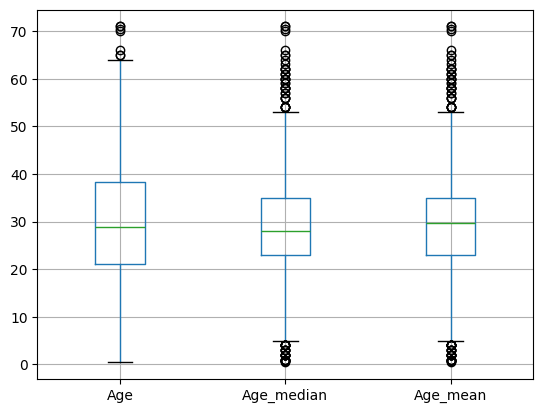

In [19]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

In [20]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

<Axes: >

Using sklearn

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [27]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [28]:
trf.fit(X_train)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('imputer1', ...), ('imputer2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``featu

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [31]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [32]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))